In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = ['HeiTi Tc']
#plt.rcParams['axes.unicode_minus'] = False
path = '01-教材/chapter3/demo/data/'
data = pd.read_excel(path + 'catering_sale.xls',index_col = '日期')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2015-03-01 to 2014-08-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   销量      200 non-null    float64
dtypes: float64(1)
memory usage: 3.1 KB


,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


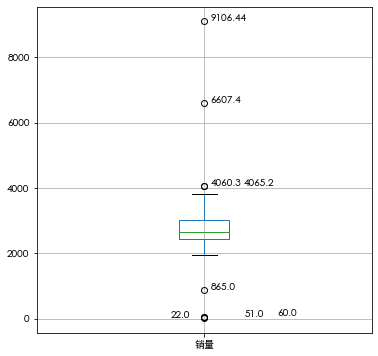

In [3]:
plt.figure(figsize = (6,6))
p = data.boxplot(return_type = 'dict')
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()
p = 1.02
#annotate 用来添加箱图的注释
for i in range(len(x)):  
    if i > 0:
        if (y[i] - y[i-1]) < 200:
            p = p + 0.1
            plt.annotate(y[i], xy = (x[i],y[i]), xytext = (p,y[i]))
        else:
            p = 1.02
            plt.annotate(y[i], xy = (x[i],y[i]), xytext = (p,y[i]))            
    else:
        plt.annotate(y[i], xy = (x[i],y[i]), xytext = (0.9,y[i]))
plt.savefig('boxplot.jpg', dpi = 400)
plt.show()
clean_data = data[(data['销量'] < 5000) & (data['销量'] > 400)]


In [4]:
data1 = pd.read_excel('01-教材/chapter3/demo/data/catering_fish_congee.xls')
data1.columns = ('date','sale')
jicha = data1['sale'].max() - data1['sale'].min()
jicha
#组距选择500， 3915 / 500 = 7.83 约等于8, [0,500),[500,1000).....[3500,4000)

3915

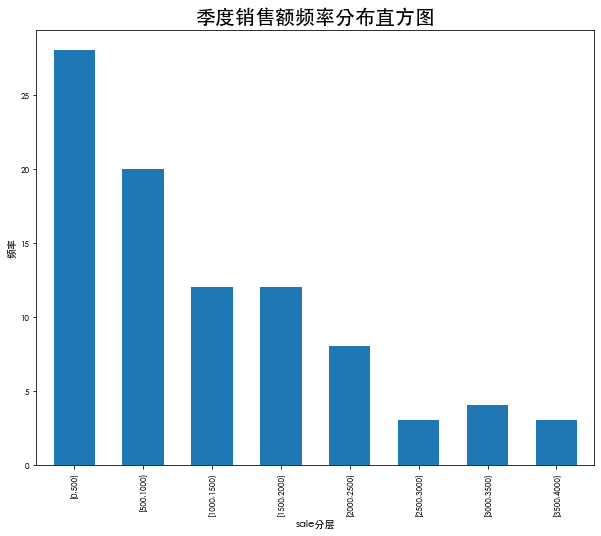

,date,sale,sale分层
0,2014-04-02,900,"[500,1000)"
1,2014-04-03,1290,"[1000,1500)"
2,2014-04-04,420,"[0,500)"
3,2014-04-05,1710,"[1500,2000)"
4,2014-04-06,1290,"[1000,1500)"
...,...,...,...
85,2014-06-26,840,"[500,1000)"
86,2014-06-27,840,"[500,1000)"
87,2014-06-28,1350,"[1000,1500)"
88,2014-06-29,1260,"[1000,1500)"


In [5]:
#按照范围区分
number = 0
labels = []
bins = [0,500,1000,1500,2000,2500,3000,3500,4000]
for i in range(0,8):
    sample = '[' + str(number) + ',' + str(number + 500) + ')'
    labels.append(sample)
    number = number + 500
data1['sale分层'] = pd.cut(data1.sale,bins,labels = labels)
aggresult = data1.groupby('sale分层')['sale'].count()
plt.figure(figsize = (10,8))
aggresult.plot(kind = 'bar', width = 0.6,fontsize = 8)
plt.title('季度销售额频率分布直方图', fontsize = 20)
plt.ylabel('频率')
plt.savefig('季度销售额频率分布直方图.jpg',dpi = 300)
plt.show()
data1

Text(0.5, 1.0, '菜品销量分布饼图')

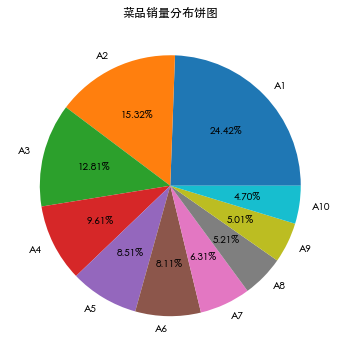

In [6]:
data2 = pd.read_excel(path + 'catering_dish_profit.xls')
x = data2['盈利']
labels = data2['菜品名']
all_profit = data2['盈利'].sum()
data2['盈利所占百分比'] = round(data2['盈利'] / all_profit,3)
plt.figure(figsize = (6,6))
plt.pie(x = data2['盈利所占百分比'],labels = labels,autopct = '%.2f%%', )
plt.title('菜品销量分布饼图')

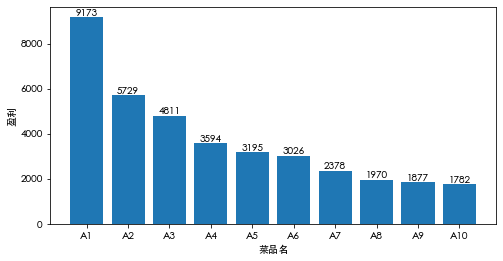

In [7]:
plt.figure(figsize=(8,4))
plt.bar(data2['菜品名'],data2['盈利'])
plt.xlabel('菜品名')
plt.ylabel('盈利')
for a,b in zip(data2['菜品名'],data2['盈利']):
    plt.text(a,b,b,ha = 'center',va = 'bottom')

In [8]:
data2

,菜品ID,菜品名,盈利,盈利所占百分比
0,17148,A1,9173,0.244
1,17154,A2,5729,0.153
2,109,A3,4811,0.128
3,117,A4,3594,0.096
4,17151,A5,3195,0.085
5,14,A6,3026,0.081
6,2868,A7,2378,0.063
7,397,A8,1970,0.052
8,88,A9,1877,0.050
9,426,A10,1782,0.047


In [9]:
data3 = pd.read_excel(path + 'dish_sale.xls')
data3

,月份,A部门,B部门,C部门
0,1月,8.00,7.70,5.3
1,2月,6.00,6.50,5.2
2,3月,6.89,7.90,5.8
3,4月,6.10,7.50,6.2
4,5月,6.05,8.00,5.9
5,6月,6.01,7.40,5.5
6,7月,6.60,7.50,6.1
7,8月,6.40,7.00,5.7
8,9月,5.80,7.20,5.4
9,10月,6.70,6.60,5.5


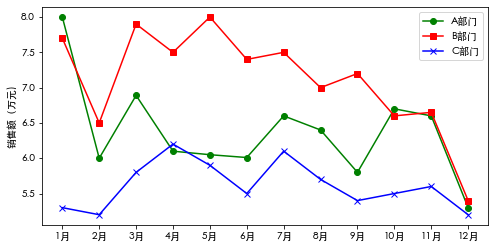

In [10]:
plt.figure(figsize = (8,4))
plt.plot(data3['月份'],data3['A部门'],color = 'green', label = 'A部门', marker = 'o')
plt.plot(data3['月份'],data3['B部门'],color = 'red', label = 'B部门', marker = 's')
plt.plot(data3['月份'],data3['C部门'],color = 'blue', label = 'C部门', marker = 'x')
plt.legend()
plt.ylabel('销售额（万元)')
plt.savefig('生成图片/各部门销售额.jpg',dpi = 300)

In [11]:
data4 = pd.read_excel(path + 'dish_sale_b.xls')
data4

,月份,2014年,2013年,2012年
0,1月,7.90,7.70,5.3
1,2月,6.00,6.50,5.2
2,3月,6.89,7.90,5.8
3,4月,7.30,7.50,6.2
4,5月,7.60,8.00,5.9
5,6月,7.20,7.40,5.5
6,7月,7.40,7.50,6.1
7,8月,7.80,7.00,5.7
8,9月,7.00,7.20,5.4
9,10月,6.70,6.60,5.5


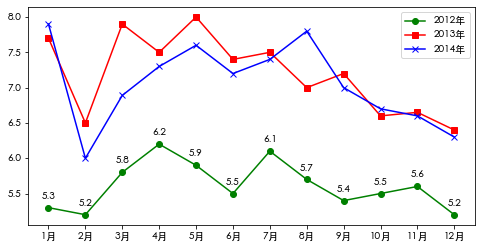

In [12]:
plt.figure(figsize = (8,4))
plt.plot(data4['月份'],data4['2012年'],label = '2012年',marker = 'o', color = 'green')
for a,b in zip(data4['月份'],data4['2012年']):
    plt.text(a,b+0.1,b,ha = 'center',va = 'bottom')
plt.plot(data4['月份'],data4['2013年'],label = '2013年',marker = 's', color = 'red')
plt.plot(data4['月份'],data4['2014年'],label = '2014年',marker = 'x', color = 'blue')
plt.legend()
plt.savefig('生成图片/B部门三年营业额.jpg',dpi=300)
plt.show()

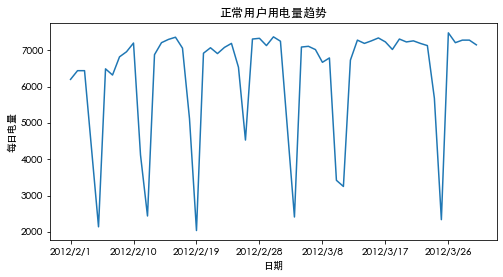

In [13]:
data5 = pd.read_csv(path + 'user.csv')
plt.figure(figsize = (8,4))
plt.plot(data5['Date'],data5['Eletricity'])
plt.xlabel('日期')
x_major_locator = plt.MultipleLocator(9)#当坐标系显示不完的时候用这个更改
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.ylabel('每日电量')
plt.title('正常用户用电量趋势')
plt.show()

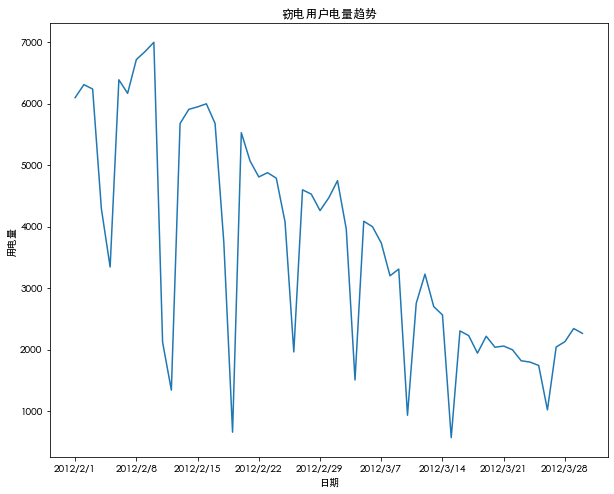

In [14]:
df_steal = pd.read_csv(path + 'Steal user.csv')
plt.figure(figsize = (10,8))
plt.plot(df_steal['Date'],df_steal['Eletricity'])
plt.xlabel('日期')
plt.ylabel('用电量')
x_major_locator = plt.MultipleLocator(7)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.title('窃电用户电量趋势')
plt.xticks(fontsize = 10)
plt.savefig('生成图片/窃电用户电量趋势.jpg', dpi = 300)
plt.show()

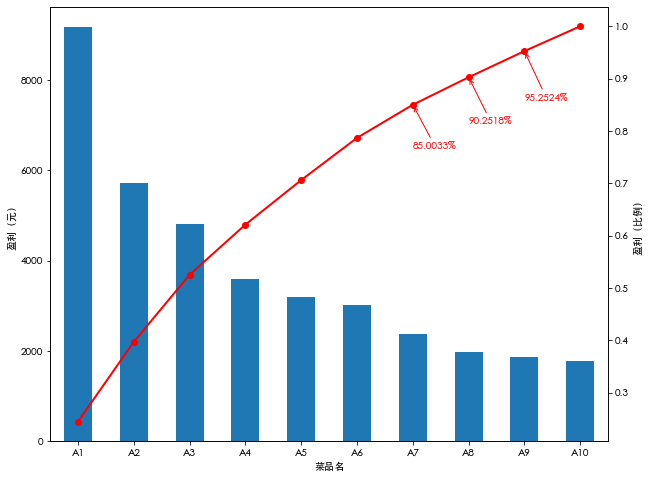

In [15]:
#帕累托图
data6 = pd.read_excel(path + 'catering_dish_profit.xls',index_col = '菜品名')
data6 = data6['盈利'].copy()
plt.figure(figsize = (10,8))
data6.plot(kind = 'bar')
plt.ylabel('盈利（元）')
p = 1.0 * data6.cumsum() / data6.sum()
p.plot(color = 'r', secondary_y = True, style = '-o', linewidth = 2)
plt.ylabel('盈利（比例）')
for index in range(0,len(p) - 1):
    if p[index] > 0.85:
        plt.annotate(format(p[index],'.4%'),xy = (index,p[index]),xytext = (index,p[index]*0.9),color = 'r',arrowprops = dict(arrowstyle = '->', color = 'r'))
plt.savefig('生成图片/绘制菜品盈利数据帕累托图.jpg', dpi = 300)
plt.show()

In [25]:
data7 = pd.read_excel(path + 'catering_sale_all.xls',index_col = '日期')
print(data7.corr()['百合酱蒸凤爪'])
print(data7['百合酱蒸凤爪'].corr(data7['翡翠蒸香茜饺']))

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64
0.009205803051836475


In [43]:
D = pd.DataFrame([range(1,8),range(2,9)])
D.corr(method = 'spearman')
S1 = D.loc[0]
S2 = D.loc[1]
S1.corr(S2,method = 'pearson')

1.0

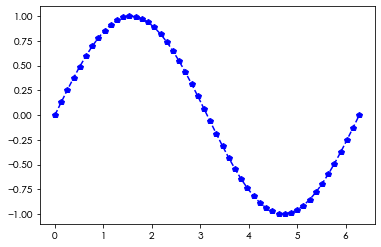

In [66]:
#lineplot 两种方式画图， DataFrame.plot, plt.plot(x,y,data) ,matplotlib
import numpy as np
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)
plt.plot(x,y,'bp--')

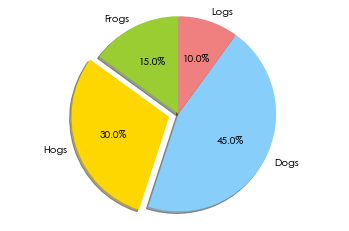

In [88]:
labels = ['Frogs','Hogs','Dogs','Logs']
sizes =  [15,30,45,10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0,0.1,0,0)
plt.pie(sizes,labels = labels, colors = colors, autopct = '%.1f%%',explode = explode, shadow = True, startangle = 90)
plt.axis('equal')
plt.savefig('生成图片/简单饼图绘制.jpg', dpi = 300)
plt.show()